# IEOR 160 HW 4

## Imports

In [1]:
# Need to have these installed every time i run 
# !pip install cvxpy
# !pip install matplotlib
# !pip install numpy
# !pip install --upgrade pip
# !pip install numdifftools

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
import numdifftools as nd

## Problem 1

In [3]:
#Solution derived using CVX
#initializing the variables to be optimized

opt_x1 = cp.Variable(1)
opt_x2 = cp.Variable(1)
opt_x3 = cp.Variable(1)
#a**x = cp.exp(cp.multiply(np.log(a), x))
term1 = cp.exp(opt_x1 - 1)
term2 = cp.exp(-opt_x1 + 1)
term3 = cp.exp(opt_x2 - 2)
term4 = cp.exp( -opt_x2 + 2)
term5 = cp.exp(opt_x3 - 3)
term6 = cp.exp(-opt_x3 + 3)
term7 = cp.power(opt_x1 + opt_x2 + opt_x3, 4)

objective = term1 + term2 + term3 + term4 + term5 + term6 + term7
problem = cp.Problem(cp.Minimize(objective))
res = problem.solve()
print("x1: {0}\nx2: {1}\nx3: {2}".format(opt_x1.value, opt_x2.value, opt_x3.value))
print("Minimum Value: {0}".format(res))

x1: [-0.64164692]
x2: [0.35835308]
x3: [1.35835307]
Minimum Value: 17.40774602388701


[ -2.35040239  -7.25372082 -20.03574985]
[ -2.17435063  -6.62237821 -16.27377995]
[ -1.55807788  -5.62117878 -13.24327101]
[ -0.47042301  -4.21917968 -10.45888994]
[ 0.79037556 -2.71394588 -7.98772131]
[ 1.84681162 -1.47342925 -6.05429329]
[ 2.51572435 -0.66396533 -4.7264952 ]
[ 2.83690462 -0.22850447 -3.8819957 ]
[ 2.93220473 -0.03255176 -3.34694151]
[ 2.90490667  0.03454685 -2.98857291]
[ 2.81832084  0.03976711 -2.72757611]
[ 2.7061461   0.01838492 -2.52138894]
[ 2.58513416 -0.01231729 -2.3480087 ]
[ 2.46328184 -0.04429737 -2.19602876]
[ 2.34425921 -0.07404664 -2.05935188]
[ 2.22964258 -0.10022414 -1.93453908]
[ 2.12000956 -0.12250036 -1.81950415]
[ 2.01546999 -0.14099909 -1.7128707 ]
[ 1.91592205 -0.15603062 -1.61365212]
[ 1.82117487 -0.1679657  -1.52108908]
[ 1.73100654 -0.17717773 -1.43456478]
[ 1.64519077 -0.18401773 -1.35355893]
[ 1.56350856 -0.18880492 -1.27762143]
[ 1.48575258 -0.19182473 -1.2063564 ]
[ 1.41172832 -0.19332998 -1.13941171]
[ 1.34125365 -0.19354348 -1.07647167]


Text(0.5, 0, 'iteration')

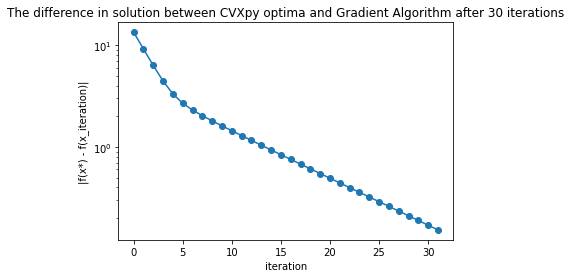

In [4]:
#write a function that handles the 1d case for gradient descent
#write an outer function that will handle the 
#recall the direction is negative gradient for the gradient method

'''
backtracking line search steps:
- fix a parameter beta from 0-1
- start with iteration e = 1
'''
def func(x):
    return (np.exp(x[0] - 1) + np.exp(-x[0] + 1) + np.exp(x[1] - 2) + np.exp(-x[1] + 2)
        + np.exp(x[2] - 3) + np.exp(-x[2] + 3) +  np.power(x[0] + x[1] + x[2], 4))

'''
Initializing variables
'''
delta = 10 ** (-3)
x1, x2, x3 = 0, 0, 0

gradient = nd.Gradient(func)([x1, x2, x3])
#print(type(gradient))
direction = -gradient
beta = 0.01
dpoints = []
dpoints.append([x1, x2, x3])

def backtracking(x1, x2, x3, gradient, delta, direction):
    #when the norm is not close enough to delta continue
    counter = 0
    while np.linalg.norm(nd.Gradient(func)([x1, x2, x3])) > delta and counter < 31:
        counter += 1
        #reset alpha/counter, backtracking line search
        alpha = 1
        while ((func([x1, x2, x3] + alpha * direction)) > (func([x1, x2, x3]) + alpha * beta * gradient.T @ direction)):  
#             print("test")
#             print(alpha * direction)
#             print("____")
#             print([x1, x2, x3] + alpha * direction)
#             print("done")
            alpha = beta * alpha
        
        gradient = nd.Gradient(func)([x1, x2, x3])
        print(gradient)
        direction = -gradient
        
        #update points
        x1 = x1 + alpha * direction[0]
        x2 = x2 + alpha * direction[1]
        x3 = x3 + alpha * direction[2]
        dpoints.append([x1, x2, x3])
    return dpoints

dpoints = backtracking(x1, x2, x3, gradient, delta, direction)

diff = []
def draw(dpoints):
    for i in range(len(dpoints)):
        diff.append(abs(func(dpoints[i]) - func([opt_x1.value, opt_x2.value, opt_x3.value])))
    print(diff)
    return diff

draw(dpoints)
plt.yscale("log")
plt.plot(diff, marker="o");
plt.title("The difference in solution between CVXpy optima and Gradient Algorithm after 30 iterations");
plt.ylabel("|f(x*) - f(x_iteration)|");
plt.xlabel("iteration")


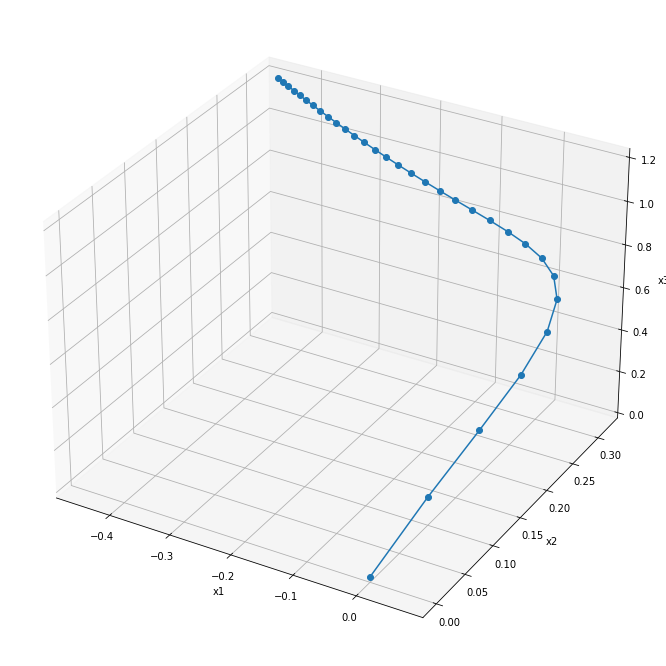

In [5]:
#plot for the 3d plot
splitted = list(zip(*dpoints))
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
# for i in range(len(splitted[0])):|
#     ax.quiver(0, 0, 0, splitted[0][i], splitted[1][i], splitted[2][i])
ax.plot(splitted[0], splitted[1], splitted[2], marker = "o")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3");

In [6]:
dpoints[-1]

[-0.45233469205750015, 0.3162137272243383, 1.2149960882624335]

## Problem 2

x1: -0.6416469888271988
x2: 0.3583530111726931
x3:1.3583530111728355

[array([13.33813062]), array([13.05236753]), array([12.77024757]), array([12.49300011]), array([12.22169872]), array([11.95718227]), array([11.70001979]), array([11.45051789]), array([11.20875794]), array([10.97464721]), array([10.74797094]), array([10.52843739]), array([10.31571312]), array([10.10944842]), array([9.9092944]), array([9.71491377]), array([9.52598706]), array([7.17613877]), array([7.17613877]), array([0.47806661]), array([0.46944632]), array([0.00911226]), array([0.00893406]), array([5.89375036e-06]), array([5.77651925e-06]), array([2.44781972e-12]), array([2.44781972e-12]), array([3.12638804e-13]), array([3.16191517e-13]), array([3.12638804e-13]), array([3.12638804e-13])]


Text(0.5, 0, 'iteration')

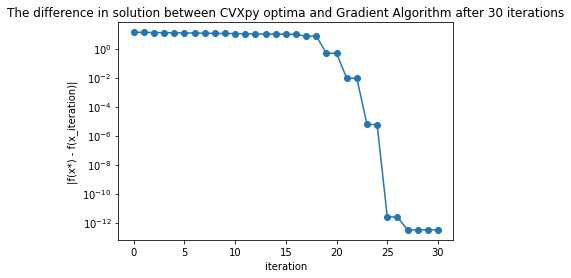

In [7]:
delta = 10 ** (-3)
x1, x2, x3 = 0, 0, 0
gradient = nd.Gradient(func)([x1, x2, x3])
#print(type(gradient))
direction = -gradient
beta = 0.01
dpoints = []
dpoints.append([x1, x2, x3])
def newtonWithBacktracking(x1, x2, x3, gradient, delta, direction):
    counter = 0
    while counter < 30:
    #while np.linalg.norm(nd.Gradient(func)([x1, x2, x3])) > delta and counter < 31:
        counter += 1
        #reset alpha/counter, backtracking line search
        alpha = 1
        while ((func([x1, x2, x3] + alpha * direction)) > (func([x1, x2, x3]) + alpha * beta * gradient.T @ direction)):  
#             print("test")
#             print(alpha * direction)
#             print("____")
#             print([x1, x2, x3] + alpha * direction)
#             print("done")
            alpha = beta * alpha
        
        gradient = nd.Gradient(func)([x1, x2, x3])
        hess = nd.Hessian(func)([x1,x2, x3])
        direction =  -1 * np.linalg.inv(hess) @ gradient.T
        
        #update points
        x1 = x1 + alpha * direction[0]
        x2 = x2 + alpha * direction[1]
        x3 = x3 + alpha * direction[2]
        dpoints.append([x1, x2, x3])
    return dpoints

dpoints = newtonWithBacktracking(x1, x2, x3, gradient, delta, direction)
print("x1: {0}\nx2: {1}\nx3:{2}\n".format(dpoints[-1][0], dpoints[-1][1], dpoints[-1][2]))
diff = []
def draw(dpoints):
    for i in range(len(dpoints)):
        diff.append(abs(func(dpoints[i]) - func([opt_x1.value, opt_x2.value, opt_x3.value])))
    print(diff)
    return diff

draw(dpoints)
plt.yscale("log")
plt.plot(diff, marker="o");
plt.title("The difference in solution between CVXpy optima and Gradient Algorithm after 30 iterations");
plt.ylabel("|f(x*) - f(x_iteration)|");
plt.xlabel("iteration")

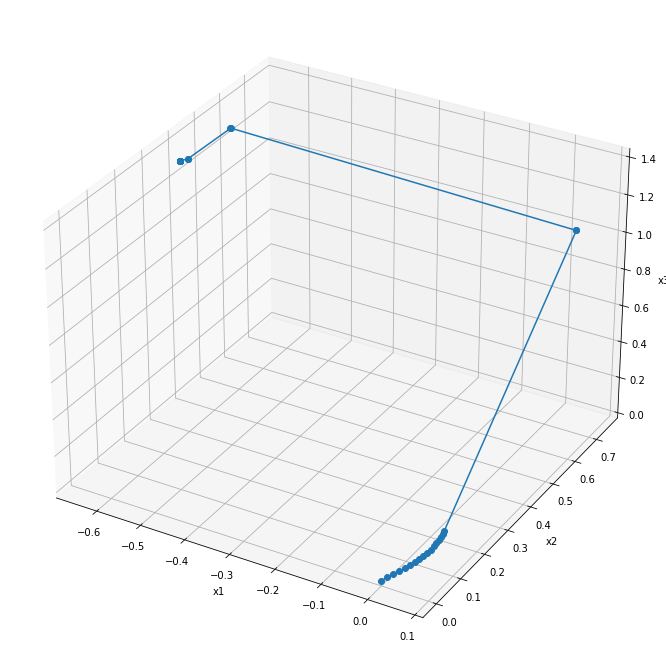

In [8]:
#plot for the 3d plot
splitted = list(zip(*dpoints))
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
# for i in range(len(splitted[0])):|
#     ax.quiver(0, 0, 0, splitted[0][i], splitted[1][i], splitted[2][i])
ax.plot(splitted[0], splitted[1], splitted[2], marker="o")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3");

## Problem 3

In [ ]:
#finding global minimum
opt_x1 = cp.Variable(1)
opt_x2 = cp.Variable(1)
opt_x3 = cp.Variable(1)
#a**x = cp.exp(cp.multiply(np.log(a), x))
term1 = cp.exp(opt_x1 - 1)
term2 = cp.exp(-opt_x1 + 1)
term3 = cp.exp(opt_x2 - 2)
term4 = cp.exp( -opt_x2 + 2)
term5 = cp.exp(opt_x3 - 3)
term6 = cp.exp(-opt_x3 + 3)
term7 = cp.power(opt_x1 + opt_x2 + opt_x3, 4)

objective = term1 + term2 + term3 + term4 + term5 + term6 + term7
problem = cp.Problem(cp.Minimize(objective))
res = problem.solve()
print("x1: {0}\nx2: {1}\nx3: {2}".format(opt_x1.value, opt_x2.value, opt_x3.value))
print("Minimum Value: {0}".format(res))

In [30]:
#log of second expression
n = 3 # Set dimension to 1000
A = np.random.rand(n, n) # Generate a random n x n matrix
A = 1/2 * (A + A.T) # Generate a random symmetric matrix
g = lambda x:(A / ((1 + A.dot(x)) * np.ones(n).T)).dot(np.ones(n)) # Define the g function
h = lambda x: A.dot(np.diag(np.ones(n) / (1 + A.dot(x))**2)).dot(A) # Define the h function

#gradient and hessian of full equations
xi = np.array([1, 2, 3])
#(A / ((1 + A.dot(x)) @ np.ones(n).T)).dot(np.ones(n))
g = lambda x:  (2*x / (x**2 - 5)) - (A / ((1 + A.dot(x)) @ np.ones(n).T)).dot(np.ones(n))# gradient of first expression - second
h = lambda x:  -(2 * (x**2 + 5) / ((x**2 - 5) ** 2)) - A.dot(np.diag(np.ones(n) / (1 + A.dot(x))**2)).dot(A)


In [31]:
g(h)

array([-0.66245737, -4.05001993,  1.35223899])

In [22]:
xi

array([[0.13086602],
       [0.4453037 ],
       [0.10252228],
       ...,
       [0.62844732],
       [0.51198389],
       [0.2143684 ]])